# AIML Assignment 1: Credit Card dataset Classification
- Name: Ashley Bai
- Admin Number: P2237871
- Class: DAAA/FT/2A/04

# Background
- This is a dataset collected from the bank. 
- The dataset contains various customer information such as Gender, Education, Credit Limit, and Payment history. 
- From the perspective of risk management, the bank wants to build a classification model <b>to 
predict which customer will have default payment in the next month.</b>
    
    - Target variable: default payment [Binary: 0 or 1] - 0 means cust will pay, 1 means cust will not pay
    
# Table of Contents
1. Background/Introduction
2. Explanatory Data Analysis (EDA)
3. Data Pre-Processing
4. Feature Engineering
5. Data Visualization
6. Building Classification Models
7. Evaluating Model Performances and choosing best model
8. Model improvement by GridSearchCV and tuning hyperparameters to yield best results
9. Use the finalised model on testing data
10. Conclusion

<h1><center>Explanatory Data Analysis (EDA): Explore <b>Raw</b> Dataset</center></h1>

<h3>Import libraries/modules</h3>

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Load the "credit_dataset.csv" dataset</h3>

In [2]:
# load dataset
credit_df = pd.read_csv("C:\YEAR 2 SEM 1\DAAAAIML\DAAAAIML_CA1\ST1511 AIML-CA1-datasets\credit_dataset.csv")

<h3>Explore the RAW dataset (general overview of how df looks like)</h3>

In [3]:
# display first few rows of df: general overview of df
credit_df.head(5)

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


- From here, we can see that university is spelled wrongly.
- Gender, Education, Marriage Status columns are categorical variables.

<h3>Check the shape of df</h3>

In [4]:
# number of rows and columns in df
credit_df.shape

(1600, 13)

- There are 1600 rows and 13 columns in the original credit dataframe.

<h3>Check data types of variables in df (especially existence of categorical variables)</h3>

In [5]:
# display data types and number of null values
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 162.6+ KB


- We can identify categorical and numerical variables from here:
    - Categorical variables: Gender, Education, Marriage Status 
    - Numerical variables: Customer ID, Credit Limit, Age, Bill_Amount1,2,3, Pay_Amount1,2,3, Default payment next month
- There are no null values in df.

<h3>Check columns in df</h3>

In [6]:
# columns in df
credit_df.columns

Index(['Customer ID', 'Credit Limit', 'Gender', 'Education', 'Marriage Status',
       'Age', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1',
       'Pay_Amount2', 'Pay_Amount3', 'Default payment next month'],
      dtype='object')

<h3>Check values in categorical columns</h3>

In [7]:
# values in columns in df (categorical variables)
print(credit_df['Marriage Status'].value_counts(), '\n')
print(credit_df['Education'].value_counts(), '\n')
print(credit_df['Gender'].value_counts())

single     899
married    701
Name: Marriage Status, dtype: int64 

univeresity      718
post-graduate    604
high school      278
Name: Education, dtype: int64 

female    940
male      660
Name: Gender, dtype: int64


<h3>Check for existence of duplicates in df</h3>

In [81]:
# check for duplicated values/rows
print('Are there duplicated values/rows in df:\n', credit_df.duplicated())
print('\n')

# count the number of duplicated rows
duplicated_rows = credit_df.duplicated().sum()

# display the number of duplicated rows
print('Number of duplicated rows: ', duplicated_rows)

Are there duplicated values/rows in df:
 2       False
3       False
4       False
5       False
6       False
        ...  
511      True
103      True
1460     True
1336     True
587      True
Length: 2520, dtype: bool


Number of duplicated rows:  932


- There are no duplicated rows in the credit dataframe.

<h3>Check for existence of outliers in df (numerical columns)</h3>

<AxesSubplot:ylabel='Age'>

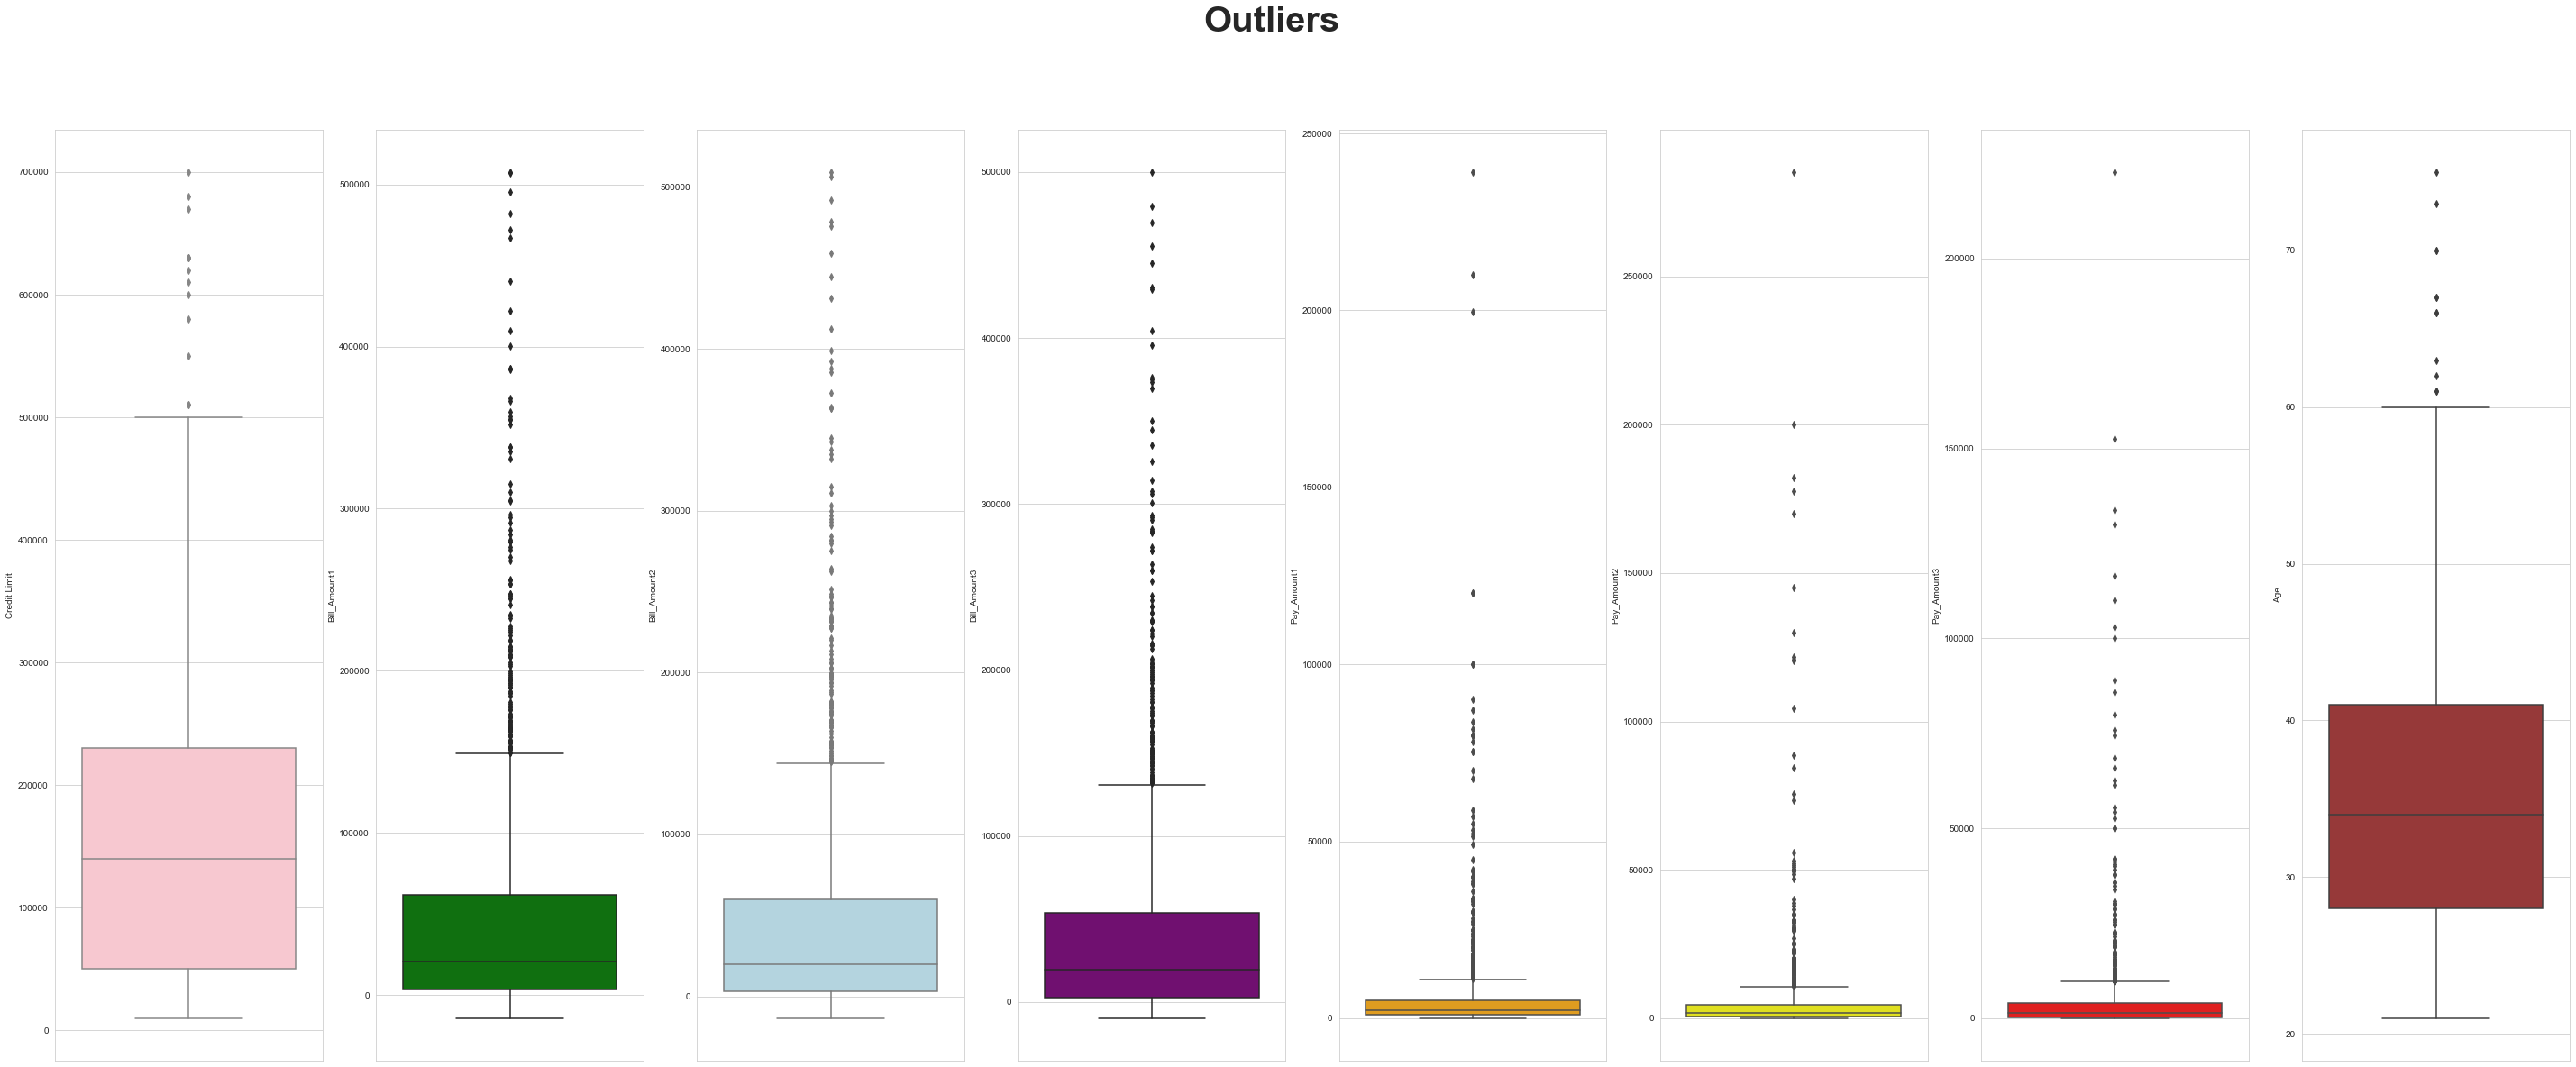

In [9]:
# check for outliers by plotting box plots 
# set grid
sns.set_style('whitegrid')

# plot box plot to check for outliers 
# create figure & axis
fig, ax = plt.subplots(1,9, figsize=(50,19))
# set title for overall figure
fig.suptitle('Outliers', weight="bold", fontsize=40)

# plot boxplots 
plt.subplot(181)
sns.boxplot(y=credit_df['Credit Limit'], color='pink')
plt.subplot(182)
sns.boxplot(y=credit_df['Bill_Amount1'], color='green')
plt.subplot(183)
sns.boxplot(y=credit_df['Bill_Amount2'], color='lightblue')
plt.subplot(184)
sns.boxplot(y=credit_df['Bill_Amount3'], color='purple')
plt.subplot(185)
sns.boxplot(y=credit_df['Pay_Amount1'], color='orange')
plt.subplot(186)
sns.boxplot(y=credit_df['Pay_Amount2'], color='yellow')
plt.subplot(187)
sns.boxplot(y=credit_df['Pay_Amount3'], color='red')
plt.subplot(188)
sns.boxplot(y=credit_df['Age'], color='brown')

- There are many outliers in the dataframe.

<h3>Check for existence of missing values in df</h3>

In [10]:
# check for missing values
# returns True if there are missing/null values
print(credit_df.isnull().values.any(), "\n")

# check for number of null values for entire dataframe
print(credit_df.isnull().sum().sum(), "\n")

# check for number of null values in each column
print(credit_df.isnull().sum(), "\n")

False 

0 

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64 



- There are no missing values in credit_dataset.csv dataframe.

<h3>Summary statistics of numerical features in df</h3>

In [11]:
# display summary statistics of numerical features
credit_df.describe().round()

,Customer ID,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0,1600.0
mean,800.0,166788.0,35.0,49263.0,47727.0,44531.0,5548.0,5230.0,4452.0,0.0
std,462.0,129945.0,9.0,72687.0,71476.0,67164.0,14085.0,15570.0,12492.0,0.0
min,1.0,10000.0,21.0,-14386.0,-13543.0,-9850.0,0.0,0.0,0.0,0.0
25%,401.0,50000.0,28.0,3138.0,3288.0,2322.0,1000.0,468.0,226.0,0.0
50%,800.0,140000.0,34.0,20320.0,19770.0,19332.0,2176.0,1904.0,1314.0,0.0
75%,1200.0,230000.0,41.0,61603.0,59892.0,53857.0,5021.0,4592.0,4000.0,0.0
max,1600.0,700000.0,75.0,507726.0,509229.0,499936.0,239104.0,285138.0,222750.0,1.0


- There are 1600 distinct credit card clients.
- The mean value for the amount of credit limit for customer is $166,788.
- Std is large (10k - 700k)
- Average age of customers is 35 years old.
- Negative Bill Amounts show that there are customers who have outstanding balance. (exceeded their credit limit)

<h1><center>Data Pre-Processing</center></h1>

<h3>Handling non-numerical columns in df via One-Hot Encoding/Label Encoding</h3>

- It is important to transform categorical variables in numerical ones as:
    - Data will be more suitable for machine learning algorithms.
    - Ordinal Relationships (Renovation Status).

In [12]:
# before
credit_df.head(5)

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


- Gender, Marriage Status: 
    - Perform Label-Encoding.
- Education: 
    - Perform One-Hot Encoding.

In [13]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder for Gender and Marriage Status
le = LabelEncoder()
 
# gender - label encoding
credit_df['Gender'] = le.fit_transform(credit_df['Gender'].values.reshape(-1)) # 0 means female, 1 means male
# marriage status - label encoding 
credit_df['Marriage Status'] = le.fit_transform(credit_df['Marriage Status'].values.reshape(-1)) # 0 means married, 1 means single

# display output
credit_df.head(5)

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,0,univeresity,0,24,3913,3102,689,0,689,0,1
1,2,120000,0,univeresity,1,26,2682,1725,2682,0,1000,1000,1
2,3,90000,0,univeresity,1,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,0,univeresity,0,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,1,univeresity,0,57,8617,5670,35835,2000,36681,10000,0


In [14]:
# use pd.get_dummies() to perform one-hot encoding on Education column
edu_encoded = pd.get_dummies(credit_df['Education'])

# concat original df with encoded education column
credit_df = pd.concat([credit_df, edu_encoded], axis=1)

# drop original unencoded Education column
credit_df = credit_df.drop('Education', axis=1)

# display output
credit_df.head(5)

,Customer ID,Credit Limit,Gender,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month,high school,post-graduate,univeresity
0,1,20000,0,0,24,3913,3102,689,0,689,0,1,0,0,1
1,2,120000,0,1,26,2682,1725,2682,0,1000,1000,1,0,0,1
2,3,90000,0,1,34,29239,14027,13559,1518,1500,1000,0,0,0,1
3,4,50000,0,0,37,46990,48233,49291,2000,2019,1200,0,0,0,1
4,5,50000,1,0,57,8617,5670,35835,2000,36681,10000,0,0,0,1


In [15]:
# after
credit_df.head(5)

,Customer ID,Credit Limit,Gender,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month,high school,post-graduate,univeresity
0,1,20000,0,0,24,3913,3102,689,0,689,0,1,0,0,1
1,2,120000,0,1,26,2682,1725,2682,0,1000,1000,1,0,0,1
2,3,90000,0,1,34,29239,14027,13559,1518,1500,1000,0,0,0,1
3,4,50000,0,0,37,46990,48233,49291,2000,2019,1200,0,0,0,1
4,5,50000,1,0,57,8617,5670,35835,2000,36681,10000,0,0,0,1


<h3>Check to see if columns are now all numerical</h3>

In [16]:
# display data types and number of null values
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Customer ID                 1600 non-null   int64
 1   Credit Limit                1600 non-null   int64
 2   Gender                      1600 non-null   int32
 3   Marriage Status             1600 non-null   int32
 4   Age                         1600 non-null   int64
 5   Bill_Amount1                1600 non-null   int64
 6   Bill_Amount2                1600 non-null   int64
 7   Bill_Amount3                1600 non-null   int64
 8   Pay_Amount1                 1600 non-null   int64
 9   Pay_Amount2                 1600 non-null   int64
 10  Pay_Amount3                 1600 non-null   int64
 11  Default payment next month  1600 non-null   int64
 12  high school                 1600 non-null   uint8
 13  post-graduate               1600 non-null   uint8
 14  univeres

- Finally, all variables are numerical variables.

<h3>Rename Columns</h3>

In [17]:
# inspect columns of credit_df
credit_df.columns

Index(['Customer ID', 'Credit Limit', 'Gender', 'Marriage Status', 'Age',
       'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1',
       'Pay_Amount2', 'Pay_Amount3', 'Default payment next month',
       'high school', 'post-graduate', 'univeresity'],
      dtype='object')

In [18]:
# rename columns that are mispelled/confusing
credit_df = credit_df.rename(columns={'high school': 'High School', 'post-graduate': 'Post-Graduate', 'univeresity': 'University'})

# display output
credit_df.head(5)

,Customer ID,Credit Limit,Gender,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month,High School,Post-Graduate,University
0,1,20000,0,0,24,3913,3102,689,0,689,0,1,0,0,1
1,2,120000,0,1,26,2682,1725,2682,0,1000,1000,1,0,0,1
2,3,90000,0,1,34,29239,14027,13559,1518,1500,1000,0,0,0,1
3,4,50000,0,0,37,46990,48233,49291,2000,2019,1200,0,0,0,1
4,5,50000,1,0,57,8617,5670,35835,2000,36681,10000,0,0,0,1


<h1><center>Feature Engineering</center></h1>

<h3>New feature 1: <b>PayAmt_Delay</b> (Bill Amount - Pay Amount)</h3>
    - To show how punctual and capable customers are in 
paying their bills, understand customer's payment behaviour, whether or not they are able to pay fully in one shot.

In [19]:
# payment delay for 1 month ago
credit_df['PayAmt_Delay1'] = credit_df['Bill_Amount1'] - credit_df['Pay_Amount1']
# payment delay for 2 months ago
credit_df['PayAmt_Delay2'] = credit_df['Bill_Amount2'] - credit_df['Pay_Amount2']
# payment delay for 3 months ago
credit_df['PayAmt_Delay3'] = credit_df['Bill_Amount3'] - credit_df['Pay_Amount3']

# display output
credit_df.head(5)

,Customer ID,Credit Limit,Gender,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month,High School,Post-Graduate,University,PayAmt_Delay1,PayAmt_Delay2,PayAmt_Delay3
0,1,20000,0,0,24,3913,3102,689,0,689,0,1,0,0,1,3913,2413,689
1,2,120000,0,1,26,2682,1725,2682,0,1000,1000,1,0,0,1,2682,725,1682
2,3,90000,0,1,34,29239,14027,13559,1518,1500,1000,0,0,0,1,27721,12527,12559
3,4,50000,0,0,37,46990,48233,49291,2000,2019,1200,0,0,0,1,44990,46214,48091
4,5,50000,1,0,57,8617,5670,35835,2000,36681,10000,0,0,0,1,6617,-31011,25835


<h3>New feature 2: <b>Utilized_Amount</b></h3> 
 - Calculate the percentage of the Bill_Amount to Credit Limit for each month.
 - This will tell us how much of their available credit customer utilized.

In [20]:
# Utilized_Amount1
credit_df['Utilized_Amount1'] = round((credit_df['Bill_Amount1'] / credit_df['Credit Limit']) * 100, 1)
# Utilized_Amount2
credit_df['Utilized_Amount2'] = round((credit_df['Bill_Amount2'] / credit_df['Credit Limit']) * 100, 1)
# Utilized_Amount3
credit_df['Utilized_Amount3'] = round((credit_df['Bill_Amount3'] / credit_df['Credit Limit']) * 100, 1)

# display output
credit_df.head(5)

,Customer ID,Credit Limit,Gender,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,...,Default payment next month,High School,Post-Graduate,University,PayAmt_Delay1,PayAmt_Delay2,PayAmt_Delay3,Utilized_Amount1,Utilized_Amount2,Utilized_Amount3
0,1,20000,0,0,24,3913,3102,689,0,689,...,1,0,0,1,3913,2413,689,19.6,15.5,3.4
1,2,120000,0,1,26,2682,1725,2682,0,1000,...,1,0,0,1,2682,725,1682,2.2,1.4,2.2
2,3,90000,0,1,34,29239,14027,13559,1518,1500,...,0,0,0,1,27721,12527,12559,32.5,15.6,15.1
3,4,50000,0,0,37,46990,48233,49291,2000,2019,...,0,0,0,1,44990,46214,48091,94.0,96.5,98.6
4,5,50000,1,0,57,8617,5670,35835,2000,36681,...,0,0,0,1,6617,-31011,25835,17.2,11.3,71.7


- Tidy up order of columns

In [21]:
# define desired order of columns
desired_order = ['Customer ID', 'Default payment next month', 'Gender', 'Marriage Status', 'Age', 'High School', 'Post-Graduate', 'University', 'Credit Limit', 
                 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'PayAmt_Delay1', 'PayAmt_Delay2', 'PayAmt_Delay3',
                 'Utilized_Amount1', 'Utilized_Amount2', 'Utilized_Amount3']

# reindex df
credit_df = credit_df.reindex(columns=desired_order)

# display output
credit_df.head(5)

,Customer ID,Default payment next month,Gender,Marriage Status,Age,High School,Post-Graduate,University,Credit Limit,Bill_Amount1,...,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,PayAmt_Delay1,PayAmt_Delay2,PayAmt_Delay3,Utilized_Amount1,Utilized_Amount2,Utilized_Amount3
0,1,1,0,0,24,0,0,1,20000,3913,...,689,0,689,0,3913,2413,689,19.6,15.5,3.4
1,2,1,0,1,26,0,0,1,120000,2682,...,2682,0,1000,1000,2682,725,1682,2.2,1.4,2.2
2,3,0,0,1,34,0,0,1,90000,29239,...,13559,1518,1500,1000,27721,12527,12559,32.5,15.6,15.1
3,4,0,0,0,37,0,0,1,50000,46990,...,49291,2000,2019,1200,44990,46214,48091,94.0,96.5,98.6
4,5,0,1,0,57,0,0,1,50000,8617,...,35835,2000,36681,10000,6617,-31011,25835,17.2,11.3,71.7


- By adding these new features which are relevant to the analysis, it will give the machine-learning model more insights to the credit dataset, hence improving or enhancing the predictive power of the models!

<h1><center>Data Visualization</center></h1>

<h3>Explore <b>Target Variable</b>: Default payment next month</h3>

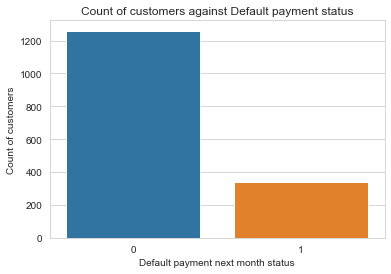

In [22]:
# plot countplot 
sns.countplot(x='Default payment next month', data=credit_df)

# graph labels, title
plt.xlabel('Default payment next month status')
plt.ylabel('Count of customers')
plt.title('Count of customers against Default payment status')
# display graph
plt.show()

- There is presence of class imbalance.
- Since '1' (will have default payment next month) is the minority, use random oversampling technique to balance the imbalance class distribution.

In [23]:
# import module
from sklearn.utils import resample 

# separate majority and minority classes
majority_class = credit_df[credit_df['Default payment next month'] == 0]
minority_class = credit_df[credit_df['Default payment next month'] == 1]

# resample the minority class to match the majority class
minority_resampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# combine majority class with resampled minority class
credit_df = pd.concat([majority_class, minority_resampled])

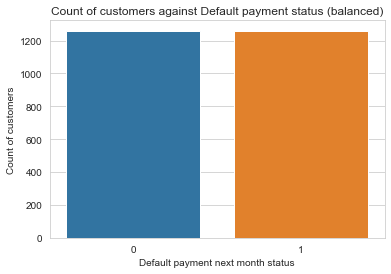

In [24]:
# plot countplot (balanced class)
sns.countplot(x='Default payment next month', data=credit_df)

# graph labels 
plt.title('Count of customers against Default payment status (balanced)')
plt.xlabel('Default payment next month status')
plt.ylabel('Count of customers')
plt.show()

- Now, the class is balanced.

<h3>Explore <b>Target-Feature</b> Relationships</h3>

<h4>1. Relationship between Gender and Default Payment Status</h4>

<Figure size 720x360 with 0 Axes>

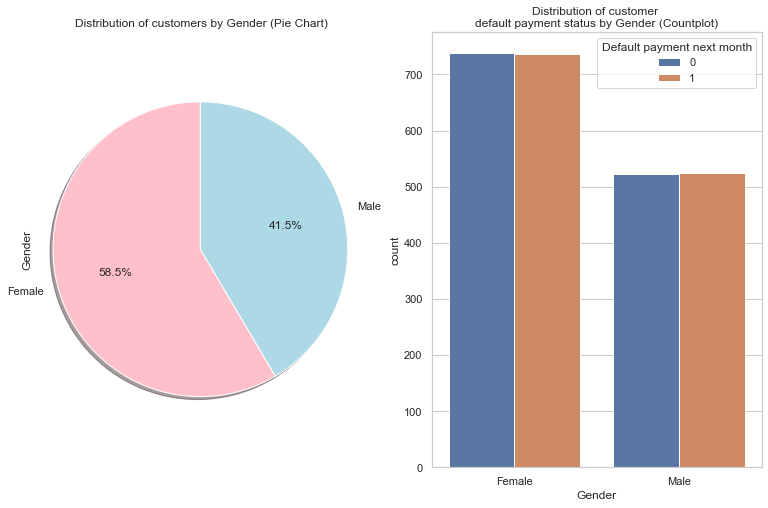

In [82]:
# create a copy of df that includes only 'Gender' and 'Default payment next month'
gender_df = credit_df[['Gender', 'Default payment next month']].copy()

# replace 0-female and 1-male in 'Gender' column to aid in data visualization
gender_df.replace({'Gender': {0: 'Female', 1: 'Male'}}, inplace=True)

# create and set figure size
plt.figure(figsize=(10, 5))
# plot 2 graphs: 1 row, 2 col
fig, axes = plt.subplots(ncols=2, figsize=(13, 8))

# set color palette of pie chart
colors = ['pink', 'lightblue']
# plot pie chart with labels for 'Gender'
gender_df['Gender'].value_counts().plot(kind="pie", ax=axes[0], colors=colors, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, shadow=True)
axes[0].axis('equal')
# pie chart labels/title
axes[0].set_title('Distribution of customers by Gender (Pie Chart)')

# plot countplot with labels for 'Gender'
sns.countplot(x='Gender', hue='Default payment next month', data=gender_df)
# count plot labels/title
axes[1].set_title('Distribution of customer \ndefault payment status by Gender (Countplot)')

# display graphs
plt.show()

- From the pie chart, it shows that there is a greater proportion of female to male customers.

<h4>2. Relationship between Marriage Status and Default Payment Status</h4>

<Figure size 720x360 with 0 Axes>

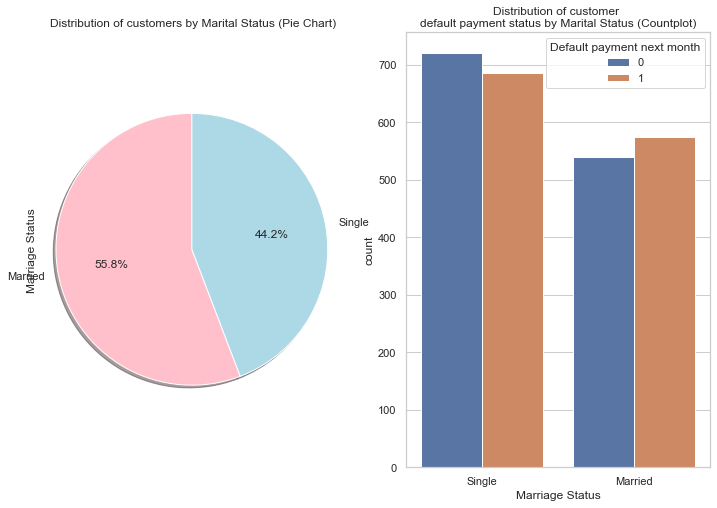

In [85]:
# create a copy of df that includes only 'Marriage Status' and 'Default payment next month'
marriage_df = credit_df[['Marriage Status', 'Default payment next month']].copy()

# replace 0-Married and 1-Single in 'Marriage Status' column to aid in data visualization
marriage_df.replace({'Marriage Status': {0: 'Married', 1: 'Single'}}, inplace=True)

# create and set figure size
plt.figure(figsize=(10, 5))
# plot 2 graphs: 1 row, 2 col
fig, axes = plt.subplots(ncols=2, figsize=(12, 8))

# set color palette of pie chart
colors = ['pink', 'lightblue']
# plot pie chart with labels for 'Marriage Status'
marriage_df['Marriage Status'].value_counts().plot(kind="pie", ax=axes[0], colors=colors, labels=['Married', 'Single'], autopct='%1.1f%%', startangle=90, shadow=True)
axes[0].axis('equal')
# pie chart labels/title
axes[0].set_title('Distribution of customers by Marital Status (Pie Chart)')

# plot countplot with labels for 'Marriage Status'
sns.countplot(x='Marriage Status', hue='Default payment next month', data=marriage_df)
# count plot labels/title
axes[1].set_title('Distribution of customer \ndefault payment status by Marital Status (Countplot)')

# display graphs
plt.show()

- From the pie chart, it shows that there is a higher proportion of 

- 3. Relationship between Education and Default Payment Status

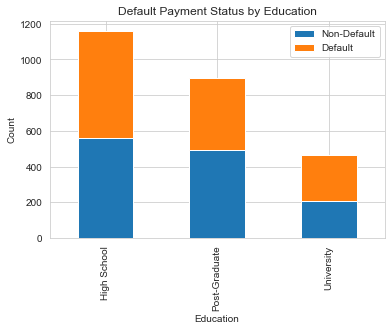

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have one-hot encoded education columns: 'High School', 'Post-Graduate', 'University'

# Compute the count of default and non-default payment status for each education category
education_counts = credit_df.groupby(['High School', 'Post-Graduate', 'University'])['Default payment next month'].value_counts().unstack()

# Plot the bar plot
ax = education_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Default Payment Status by Education')

# Change the names of each bar
x_labels = ['High School', 'Post-Graduate', 'University']
ax.set_xticklabels(x_labels)

# Add legend
legend_labels = ['Non-Default', 'Default']
ax.legend(legend_labels)

# Show the plot
plt.show()

- 4. Relationship between Credit Limit and Default Payment Status

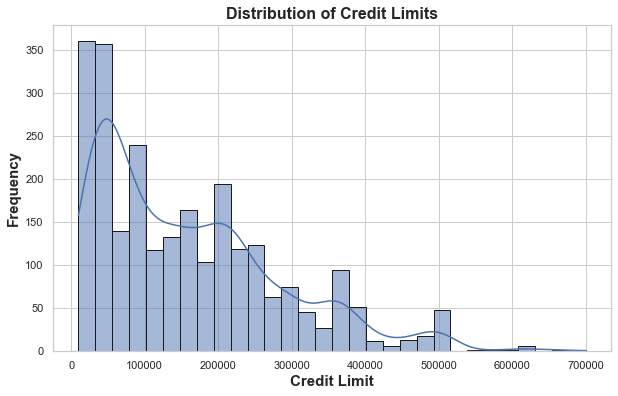

In [28]:
# create figure and set figure size
plt.figure(figsize=(10, 6))

# set theme
sns.set_theme(style='whitegrid')

# plot the histogram of Credit limit
plt.hist(credit_df['Credit Limit'], bins=30, edgecolor='k', density=True, alpha=0.7)

# plot the histogram of Credit limit with KDE curve
sns.histplot(credit_df['Credit Limit'], bins=30, kde=True, edgecolor='k')

# graph labels
plt.xlabel('Credit Limit', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
# graph title
plt.title('Distribution of Credit Limits', fontsize=16, fontweight='bold')
# display graph
plt.show()

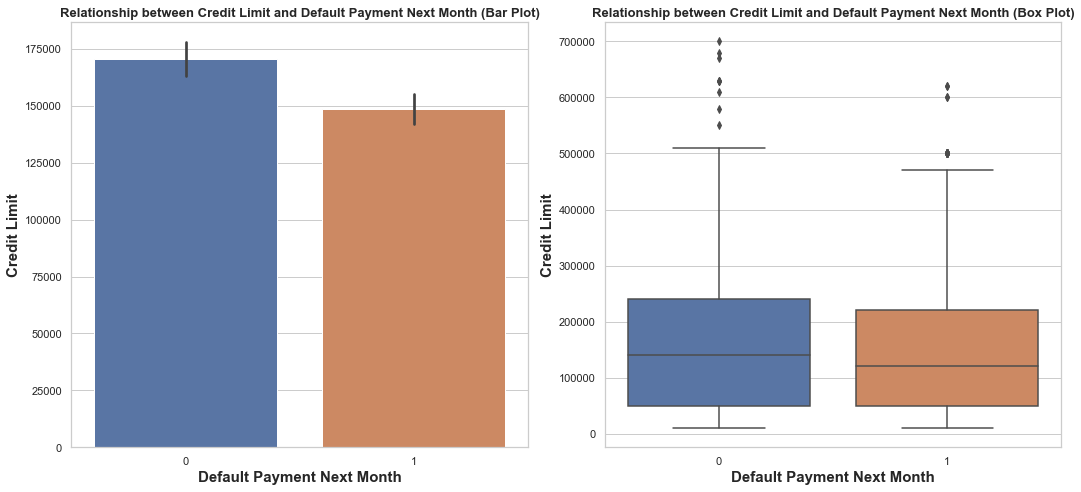

In [29]:
# set theme
sns.set_theme(style='whitegrid')

# create and set figure size
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# plot the bar plot on the first subplot
sns.barplot(x='Default payment next month', y='Credit Limit', data=credit_df, ax=axes[0])
axes[0].set_xlabel('Default Payment Next Month', fontsize=15, fontweight='bold')
axes[0].set_ylabel('Credit Limit', fontsize=15, fontweight='bold')
axes[0].set_title('Relationship between Credit Limit and Default Payment Next Month (Bar Plot)', fontsize=13, fontweight='bold')

# plot the box plot on the second subplot
sns.boxplot(x='Default payment next month', y='Credit Limit', data=credit_df, ax=axes[1])
axes[1].set_xlabel('Default Payment Next Month', fontsize=15, fontweight='bold')
axes[1].set_ylabel('Credit Limit', fontsize=15, fontweight='bold')
axes[1].set_title('Relationship between Credit Limit and Default Payment Next Month (Box Plot)', fontsize=13, fontweight='bold')

# create spacing between graphs 
plt.tight_layout()

# display graphs
plt.show()

- 5. Correlation of various numerical columns ($$)

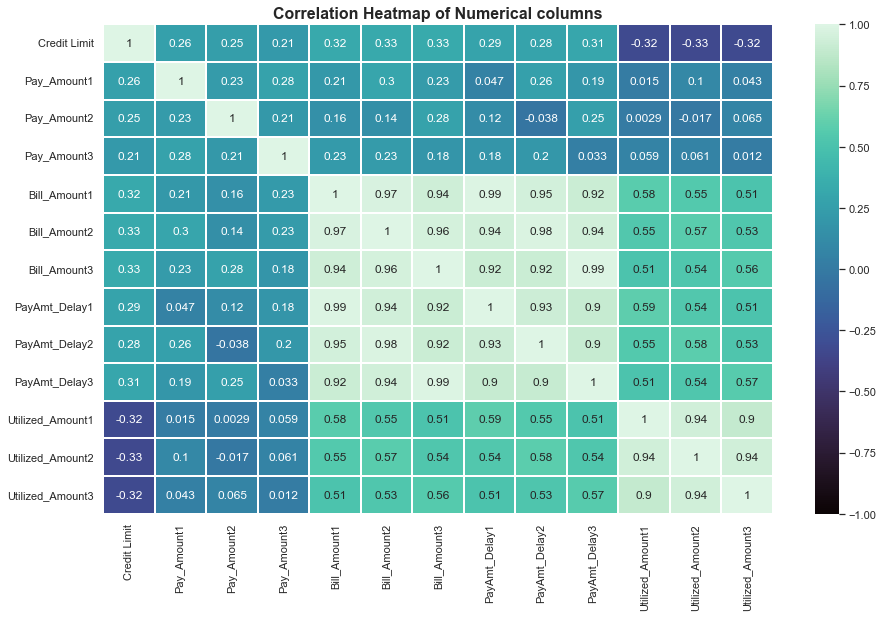

In [30]:
# define variables 
vars = ['Credit Limit', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3', 'Bill_Amount1','Bill_Amount2','Bill_Amount3', 'PayAmt_Delay1', 'PayAmt_Delay2', 'PayAmt_Delay3', 'Utilized_Amount1', 'Utilized_Amount2', 'Utilized_Amount3'] 

# create and set figure size
plt.figure(figsize = (15,9))

# correlation plot
corr = credit_df[vars].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, vmin=-1.0, cmap='mako', annot=True)

# graph title
plt.title('Correlation Heatmap of Numerical columns', fontweight='bold', fontsize=16)
# display graph
plt.show()

- 6. Relationship between Age and Default Payment Status

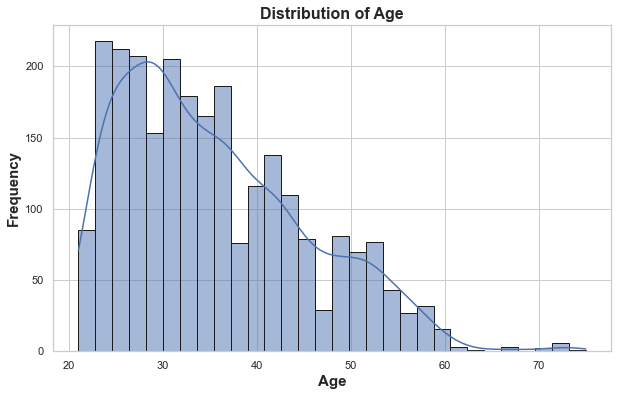

In [31]:
# create figure and set figure size
plt.figure(figsize=(10, 6))

# set theme
sns.set_theme(style='whitegrid')

# plot the histogram of Credit limit
plt.hist(credit_df['Age'], bins=30, edgecolor='k', density=True, alpha=0.7)

# plot the histogram of Age with KDE curve
sns.histplot(credit_df['Age'], bins=30, kde=True, edgecolor='k')

# graph labels
plt.xlabel('Age', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')
# graph title
plt.title('Distribution of Age', fontsize=16, fontweight='bold')
# display graph
plt.show()

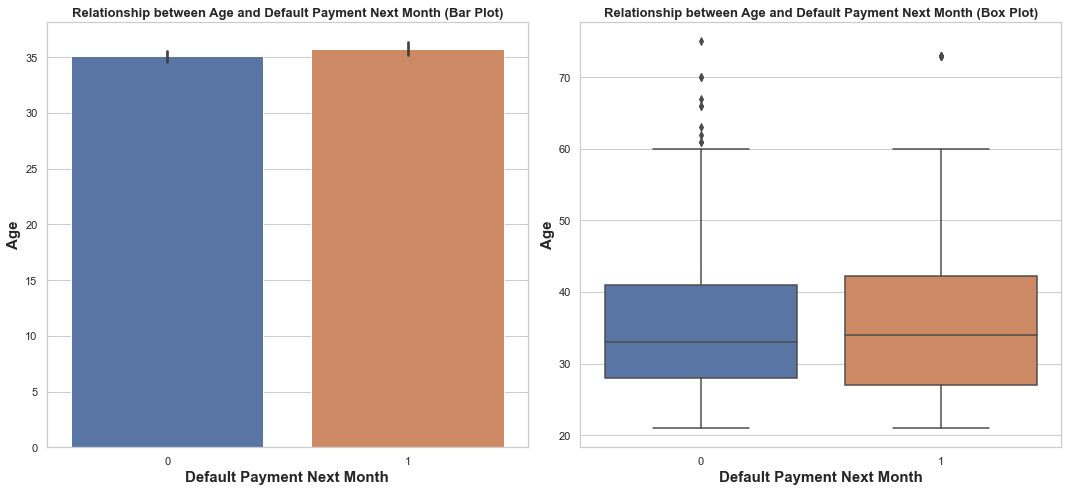

In [32]:
# set theme
sns.set_theme(style='whitegrid')

# create and set figure size
# create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# plot the bar plot on the first subplot
sns.barplot(x='Default payment next month', y='Age', data=credit_df, ax=axes[0])
axes[0].set_xlabel('Default Payment Next Month', fontsize=15, fontweight='bold')
axes[0].set_ylabel('Age', fontsize=15, fontweight='bold')
axes[0].set_title('Relationship between Age and Default Payment Next Month (Bar Plot)', fontsize=13, fontweight='bold')

# plot the box plot on the second subplot
sns.boxplot(x='Default payment next month', y='Age', data=credit_df, ax=axes[1])
axes[1].set_xlabel('Default Payment Next Month', fontsize=15, fontweight='bold')
axes[1].set_ylabel('Age', fontsize=15, fontweight='bold')
axes[1].set_title('Relationship between Age and Default Payment Next Month (Box Plot)', fontsize=13, fontweight='bold')

# create spacing between graphs 
plt.tight_layout()

# display graphs
plt.show()

- 7. Relationship between Credit Limit and Bill Amount

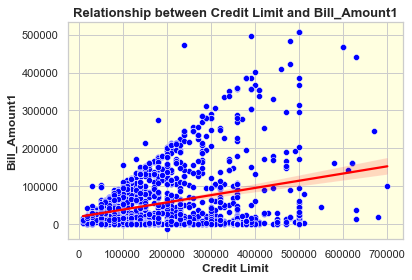

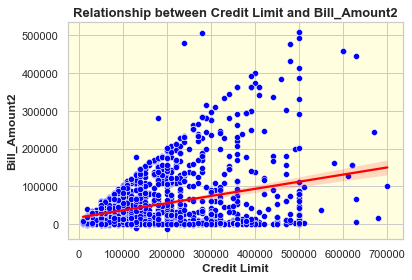

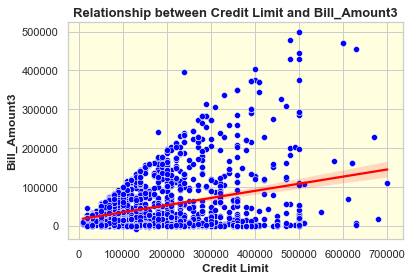

In [33]:
# set style
sns.set_theme(style='whitegrid')

# define the bill amount columns
bill_amounts = ['Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3']

# plot scatter plots with regression line
for bill_amountn in bill_amounts:
    # create and set figure size
    plt.figure(figsize=(6, 4))
    
    # plot scatter plot
    scatterplot = sns.scatterplot(x='Credit Limit', y=bill_amountn, data=credit_df, color='blue')
    # plot regression line
    sns.regplot(x='Credit Limit', y=bill_amountn, data=credit_df, scatter=False, color='red')
    
    # set the colors of the scatter points
    scatterplot.set_facecolor('lightyellow')
    
    # graph labels
    plt.xlabel('Credit Limit', fontweight='bold', fontsize=12)
    plt.ylabel(bill_amountn, fontweight='bold', fontsize=12)
    # graph title
    plt.title(f'Relationship between Credit Limit and {bill_amountn}', fontweight='bold', fontsize=13)
    # display graph
    plt.show()

- 8. Relationship between Credit Limit and Pay Amount

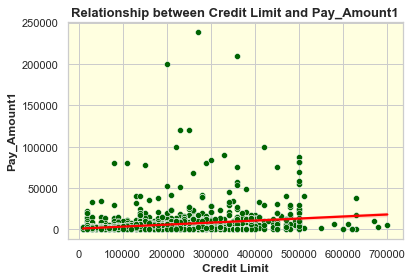

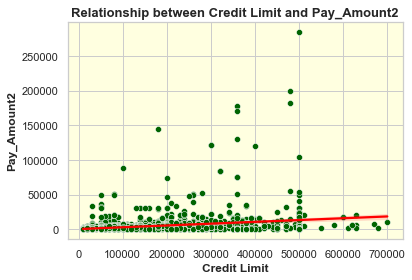

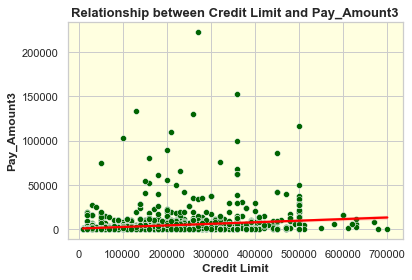

In [34]:
# set style
sns.set_theme(style='whitegrid')

# define the bill amount columns
pay_amounts = ['Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3']

# plot scatter plots with regression line
for pay_amountn in pay_amounts:
    # create and set figure size
    plt.figure(figsize=(6, 4))
    
    # plot scatter plot
    scatterplot = sns.scatterplot(x='Credit Limit', y=pay_amountn, data=credit_df, color='darkgreen')
    # plot regression line
    sns.regplot(x='Credit Limit', y=pay_amountn, data=credit_df, scatter=False, color='red')
    
    # set the colors of the scatter points
    scatterplot.set_facecolor('lightyellow')
    
    # graph labels
    plt.xlabel('Credit Limit', fontweight='bold', fontsize=12)
    plt.ylabel(pay_amountn, fontweight='bold', fontsize=12)
    # graph title
    plt.title(f'Relationship between Credit Limit and {pay_amountn}', fontweight='bold', fontsize=13)
    # display graph
    plt.show()

- 9. Relationship between Payment Delay and Default Payment Status 

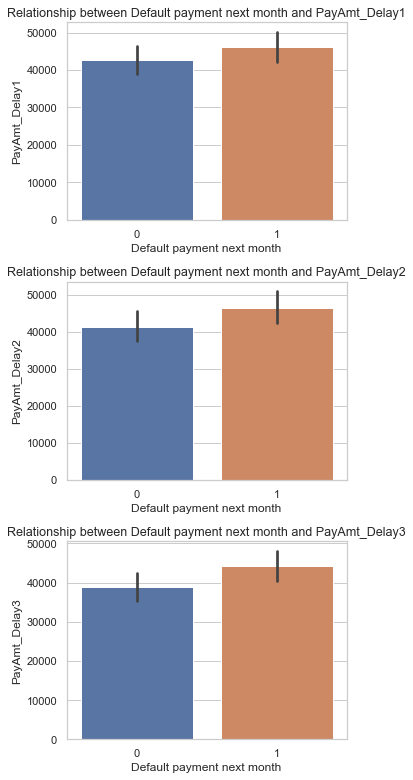

In [35]:
# define variables
paydelay = ['PayAmt_Delay1', 'PayAmt_Delay2', 'PayAmt_Delay3']

# create and set figure size
plt.figure(figsize=(5, 11))

# plot subplots (bar plots)
for i, var in enumerate(paydelay, 1):
    plt.subplot(3, 1, i)
    sns.barplot(x='Default payment next month', y=var, data=credit_df)
    plt.xlabel('Default payment next month', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.title('Relationship between Default payment next month and {}'.format(var), fontsize=12.5)

# adjust spacing between subplots
plt.tight_layout()

# display the graphs
plt.show()

- 10. Relationship between Utilized Amount and Default Payment Status

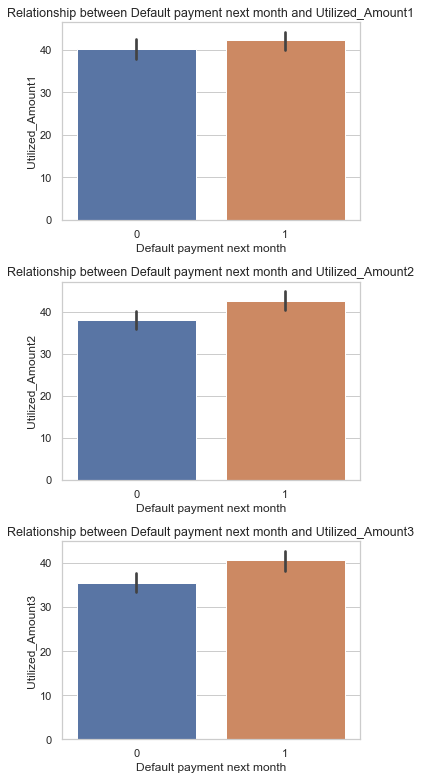

In [36]:
# define variables
utilised = ['Utilized_Amount1', 'Utilized_Amount2', 'Utilized_Amount3']

# create and set figure size
plt.figure(figsize=(5, 11))

# plot subplots (bar plots)
for i, var in enumerate(utilised, 1):
    plt.subplot(3, 1, i)
    sns.barplot(x='Default payment next month', y=var, data=credit_df)
    plt.xlabel('Default payment next month', fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.title('Relationship between Default payment next month and {}'.format(var), fontsize=12.5)

# adjust spacing between subplots
plt.tight_layout()

# display the graphs
plt.show()

<h1><center>Building Classification Models</center></h1>

<h2>K-Nearest Neighbor (KNN)</h2>

              precision    recall  f1-score   support

           0       0.80      0.63      0.71       305
           1       0.69      0.84      0.76       300

    accuracy                           0.74       605
   macro avg       0.75      0.74      0.73       605
weighted avg       0.75      0.74      0.73       605

-> The accuracy of n=1 in KNN model is 73.72%


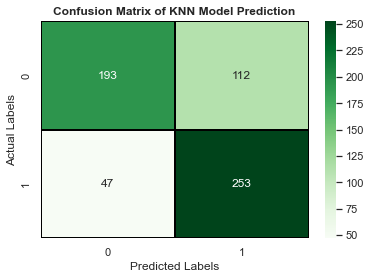



              precision    recall  f1-score   support

           0       0.66      0.53      0.59       305
           1       0.60      0.72      0.66       300

    accuracy                           0.62       605
   macro avg       0.63      0.63      0.62       605
weighted avg       0.63      0.62      0.62       605

-> The accuracy of n=3 in KNN model is 62.48%


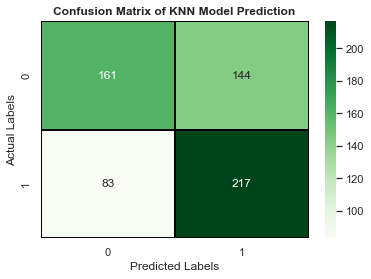



              precision    recall  f1-score   support

           0       0.60      0.53      0.57       305
           1       0.58      0.64      0.61       300

    accuracy                           0.59       605
   macro avg       0.59      0.59      0.59       605
weighted avg       0.59      0.59      0.59       605

-> The accuracy of n=5 in KNN model is 58.84%


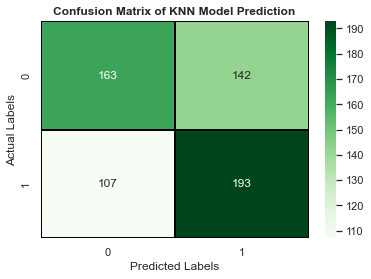



              precision    recall  f1-score   support

           0       0.58      0.61      0.59       305
           1       0.58      0.54      0.56       300

    accuracy                           0.58       605
   macro avg       0.58      0.58      0.58       605
weighted avg       0.58      0.58      0.58       605

-> The accuracy of n=10 in KNN model is 57.69%


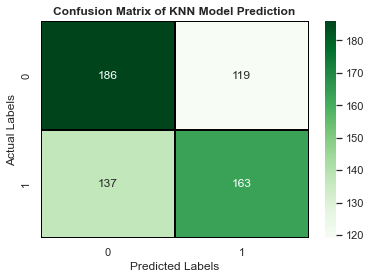



              precision    recall  f1-score   support

           0       0.57      0.53      0.55       305
           1       0.55      0.58      0.57       300

    accuracy                           0.56       605
   macro avg       0.56      0.56      0.56       605
weighted avg       0.56      0.56      0.56       605

-> The accuracy of n=15 in KNN model is 55.87%


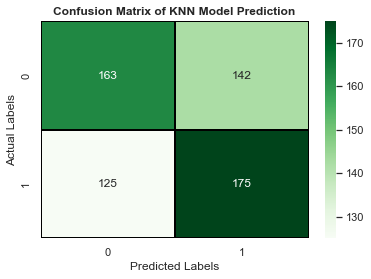

In [37]:
# k-Nearest Neighbor
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

n_neighbors_values = [1, 3, 5, 10, 15]
all_accuracy = []

# create empty dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

for n in n_neighbors_values:

    # build the steps for the pipeline
    steps = [('scaler', StandardScaler()),         
             ('knn', KNeighborsClassifier(n_neighbors=n))]

    # create the pipeline by passing the steps
    pipeline = Pipeline(steps)

    # split the data into train and test sets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

    # further split the train set into a new train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

    # fit the pipeline on training data
    knn_scaled = pipeline.fit(X_train, y_train)

    # make predictions on validation data
    expected = y_val
    predicted = knn_scaled.predict(X_val)

    # summarize the fit of the KNN model
    print(metrics.classification_report(expected, predicted))
    # print(metrics.confusion_matrix(expected,predicted))

    accuracy = accuracy_score(predicted, expected)
    all_accuracy.append(accuracy)
    print('-> The accuracy of n={} in KNN model is {:.2f}%'.format(n, accuracy*100))
    
    # store the accuracy of training and testing data
    train_accuracies[n] = pipeline.score(X_train, y_train)
    test_accuracies[n] = pipeline.score(X_test, y_test)
    
    # data visualization of confusion matrix (of best n_neighbour value)
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(expected, predicted)

    # plot heatmap
    # prevent values displayed in scientific notation - fmt='.0f'
    sns.heatmap(data=cm, annot=True, fmt='.0f', cmap='Greens', linewidths=.2, linecolor="black")
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix of KNN Model Prediction', fontsize=12, fontweight='bold')
    plt.show()

    print('\n')

<h4>

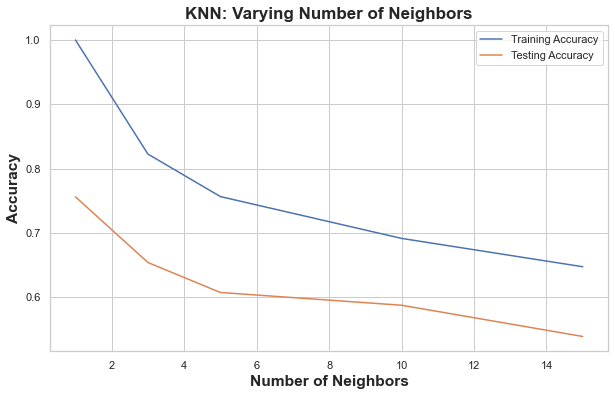

In [38]:
# create and set figure size
plt.figure(figsize=(10,6))

# plot line graphs
plt.plot(n_neighbors_values, train_accuracies.values(), label="Training Accuracy")
plt.plot(n_neighbors_values, test_accuracies.values(), label="Testing Accuracy")

# graph labels, title, legend
plt.xlabel('Number of Neighbors', fontweight='bold', fontsize=15.5)
plt.ylabel('Accuracy', fontweight='bold', fontsize=15.5)
plt.title('KNN: Varying Number of Neighbors', fontweight='bold', fontsize=17)
plt.legend()
# display graph
plt.show()

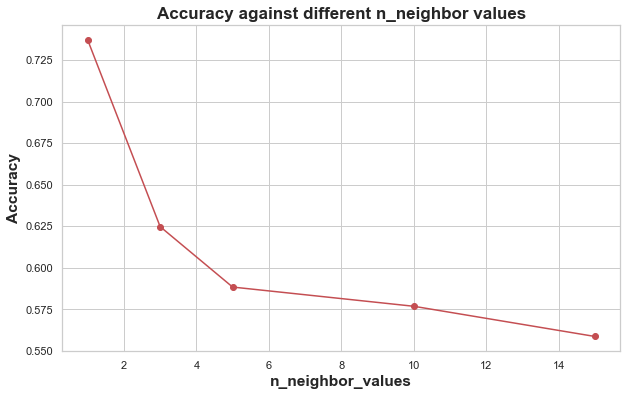

In [39]:
# create and set figure size
plt.figure(figsize=(10,6))

# plot the accuracy against diff n_neighbor values to see which n_neighbor value gives the highest accuracy
plt.plot(n_neighbors_values, all_accuracy, 'ro-')

# graph labels, title
plt.xlabel("n_neighbor_values", fontweight='bold', fontsize=15.5)
plt.ylabel('Accuracy', fontweight='bold', fontsize=15.5)
plt.title('Accuracy against different n_neighbor values', fontweight='bold', fontsize=17)
# display graph
plt.show()

- Since n=1 is best for KNN:

In [40]:
# build the steps for the pipeline
steps = [('scaler', StandardScaler()),         
        ('knn', KNeighborsClassifier(n_neighbors=1))]

# create the pipeline by passing the steps
pipeline = Pipeline(steps)

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# fit the pipeline on training data
knn_scaled = pipeline.fit(X_train, y_train)

# make predictions on validation data
expected = y_val
predicted = knn_scaled.predict(X_val)

# summarize the fit of the KNN model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71       305
           1       0.69      0.84      0.76       300

    accuracy                           0.74       605
   macro avg       0.75      0.74      0.73       605
weighted avg       0.75      0.74      0.73       605

[[193 112]
 [ 47 253]]


<h2>Logistic Regression</h2>

In [41]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

# build the steps for the pipeline
steps = [('scaler', StandardScaler()),         
         ('logreg', LogisticRegression(solver='newton-cg', C=2.0))]

# create the pipeline by passing the steps
pipeline = Pipeline(steps)

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# fit the pipeline on training data
logreg_scaled = pipeline.fit(X_train, y_train)

# make predictions on validation data
expected1 = y_val
predicted1 = logreg_scaled.predict(X_val)

# summarize the fit of the LogisticRegression model
print(metrics.classification_report(expected1, predicted1))
print(metrics.confusion_matrix(expected1,predicted1))

              precision    recall  f1-score   support

           0       0.55      0.44      0.49       305
           1       0.53      0.63      0.57       300

    accuracy                           0.53       605
   macro avg       0.54      0.53      0.53       605
weighted avg       0.54      0.53      0.53       605

[[134 171]
 [111 189]]


<h4>Confusion Matrix for Logistic Regression</h4>

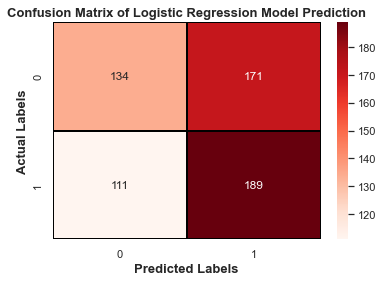

In [42]:
# data visualization of confusion matrix for Logistic Regression
cm1 = confusion_matrix(expected1, predicted1)

# plot heatmap
sns.heatmap(data=cm1, annot=True, cmap='Reds', fmt='.0f', linewidths=.2, linecolor="black")
plt.xlabel('Predicted Labels', fontsize=13, fontweight='bold')
plt.ylabel('Actual Labels', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix of Logistic Regression Model Prediction', fontsize=13, fontweight='bold')
plt.show()

<h4>Feature Importance for Logistic Regression</h4>

- Coefficients

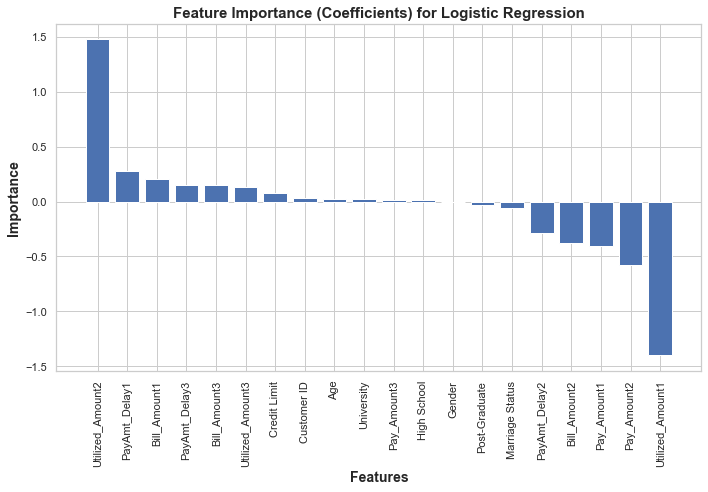

In [43]:
# get feature importance by taking coefficient of logistic regression model 
# the coefficients indicate the direction and magnitude of the impact of each feature has on the prediction of logistic regression model.
feature0_impt = logreg_scaled.named_steps['logreg'].coef_[0]

# sort feature importance and feature names in desc order
# zip() - combines the feature names and feature importance (in pairs)
# lambda function to indicate that sort base on feature importance
sortedImpt = sorted(zip(X.columns, feature0_impt), key=lambda x: x[1], reverse=True)

# extract the values of feature importance and feature names 
# * reverses zip()
feature_names, feature_importance = zip(*sortedImpt)

# create and set figure size
plt.figure(figsize=(10,7))

# plot bar graph
plt.bar(feature_names, feature_importance)

# graph labels, title
plt.xlabel('Features', fontweight='bold', fontsize=14)
plt.ylabel('Importance', fontweight='bold', fontsize=14)
plt.title('Feature Importance (Coefficients) for Logistic Regression', fontweight='bold', fontsize=15)
# rotate x-axis labels 
plt.xticks(rotation=90)

# display graph
plt.tight_layout()
plt.show()

- Permutation Importance

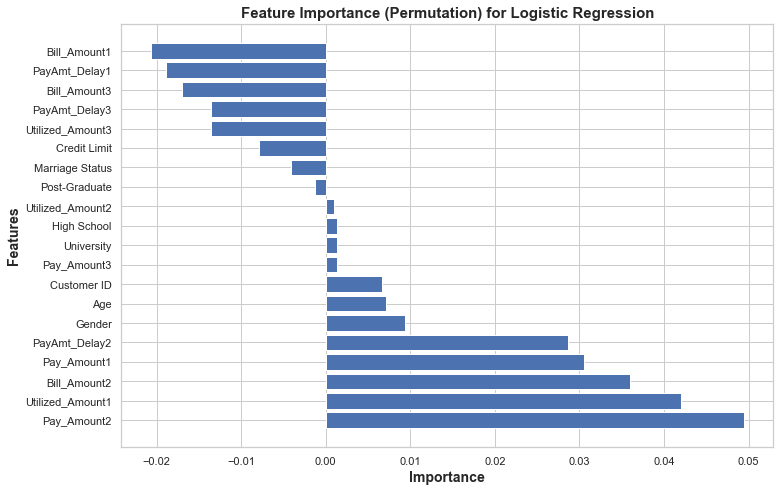

In [44]:
# import Permutation Importance
from sklearn.inspection import permutation_importance

# perform Permutation Importance 
feature_impt = permutation_importance(logreg_scaled, X_val, y_val, n_repeats=10, random_state=0)

# get feature names (columns in df except for target var)
feature_names = X.columns

# get mean importance score - use importances_mean which is an attribute of permutation_importance
mean_impt = feature_impt.importances_mean

# sort features by importance
# sort features indices based on mean impt scores in desc order
sortInd = np.argsort(mean_impt)[::-1]
# use sortInd to further sort feature names and mean impt scores
sortFeatures = feature_names[sortInd]
sortImpt = mean_impt[sortInd]

# plot feature importance (visualize better)
# create and set figure size
plt.figure(figsize=(11,7))

# plot bar graph
plt.barh(sortFeatures, sortImpt)

# graph labels
plt.xlabel('Importance', fontweight='bold', fontsize=14)
plt.ylabel('Features', fontweight='bold', fontsize=14)
# graph title
plt.title('Feature Importance (Permutation) for Logistic Regression', fontweight='bold', fontsize=15)
# display graph
plt.tight_layout()
plt.show()

- Negative values suggest that:
    - feature has a negative impact on the model's performance/prediction.
    - or that feature has weak relationship with target variable/not relevant.

<h2>Decision Tree Classifier</h2>

In [45]:
# Decision Tree Classifier
# Do not require feature scaling as they are not sensitive to the variance of the data
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# create DTC classification model 
DTC = DecisionTreeClassifier()

# fit DTC model on training data
DTC.fit(X_train, y_train)

# make predictions on validation data 
expected2 = y_val
predicted2 = DTC.predict(X_val)

# summarize the fit of the DTC model
print(metrics.classification_report(expected2, predicted2))
print(metrics.confusion_matrix(expected2,predicted2))

              precision    recall  f1-score   support

           0       0.77      0.62      0.69       305
           1       0.68      0.82      0.74       300

    accuracy                           0.72       605
   macro avg       0.73      0.72      0.71       605
weighted avg       0.73      0.72      0.71       605

[[188 117]
 [ 55 245]]


<h4>Confusion Matrix for Decision Tree Classifier</h4>

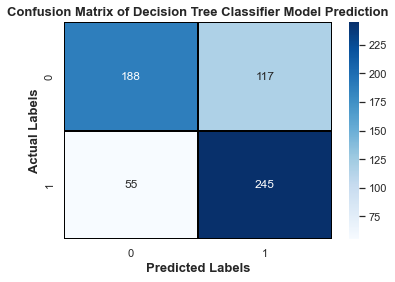

In [46]:
# data visualization of confusion matrix for Decision Tree Classifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(expected2, predicted2)

# plot heatmap
sns.heatmap(data=cm2, annot=True, cmap='Blues',fmt='.0f', linewidths=.2,linecolor="black")
plt.xlabel('Predicted Labels', fontsize=13, fontweight='bold')
plt.ylabel('Actual Labels', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix of Decision Tree Classifier Model Prediction', fontsize=13, fontweight='bold')
plt.show()

<h4>Feature Importance for Decision Tree Classifier</h4>

- Use .feature_importances_ attribute by Sklearn

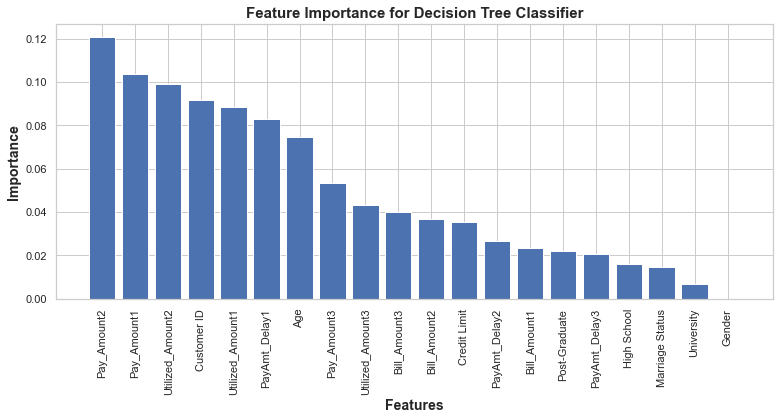

In [47]:
# get feature importance
DTC_featureImpt = DTC.feature_importances_

# get feature names (columns in df)
DTC_featureNames = X.columns

# sort indices, feature names and feature importance by descending order
DTC_sortedInd = np.argsort(DTC_featureImpt)[::-1]
DTC_sortedFeatures = DTC_featureNames[DTC_sortedInd]
DTC_sortedImpt = DTC_featureImpt[DTC_sortedInd]

# create and set figure size
plt.figure(figsize=(11, 6))

# plot feature importance bar graph
plt.bar(DTC_sortedFeatures, DTC_sortedImpt)

# graph labels, title
plt.xlabel('Features', fontweight='bold', fontsize=14)
plt.ylabel('Importance', fontweight='bold', fontsize=14)
plt.title('Feature Importance for Decision Tree Classifier', fontweight='bold', fontsize=15)
# rotate x-axis labels 
plt.xticks(rotation=90)
# display graph
plt.tight_layout()
plt.show()

<h2>Gaussian Naive Bayes</h2>

In [48]:
# Gaussian Naive Bayes
# Does not require feature scaling as this is based on probability, assumes that features follow a Gaussian (normal) distribution
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# create Gaussian Naive Bayes model
gaussianNB = GaussianNB()
# fit Gaussian Naive Bayes model to the training data
gaussianNB.fit(X_train, y_train)

# make predictions on validation data 
expected3 = y_val
predicted3 = gaussianNB.predict(X_val)

# summarize the fit of the Gaussian Naive Bayes model
print(metrics.classification_report(expected3, predicted3))
print(metrics.confusion_matrix(expected3,predicted3))

              precision    recall  f1-score   support

           0       0.70      0.16      0.26       305
           1       0.52      0.93      0.67       300

    accuracy                           0.54       605
   macro avg       0.61      0.55      0.46       605
weighted avg       0.61      0.54      0.46       605

[[ 49 256]
 [ 21 279]]


<h4>Confusion Matrix of Gaussian Naive Bayes</h4>

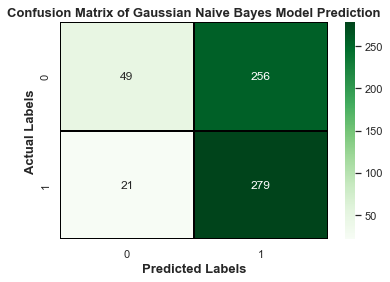

In [49]:
# data visualization of confusion matrix for Gaussian Naive Bayes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(expected3, predicted3)

# plot heatmap
sns.heatmap(data=cm3, annot=True, cmap='Greens', fmt='.0f', linewidths=.2,linecolor="black")
plt.xlabel('Predicted Labels', fontsize=13, fontweight='bold')
plt.ylabel('Actual Labels', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix of Gaussian Naive Bayes Model Prediction', fontsize=13, fontweight='bold')
plt.show()

<h2>SVC</h2>

In [50]:
# SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

# build the steps for the pipeline
steps = [('scaler', StandardScaler()),         
         ('SVC', SVC(probability=True))]

# create the pipeline by passing the steps
pipeline = Pipeline(steps)

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train an, d validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# fit SVC model to the training data
SVC = pipeline.fit(X_train, y_train)

# make predictions on validation data 
expected4 = y_val
predicted4 = SVC.predict(X_val)

# summarize the fit of the SVC model
print(metrics.classification_report(expected4, predicted4))
print(metrics.confusion_matrix(expected4,predicted4))

              precision    recall  f1-score   support

           0       0.58      0.51      0.54       305
           1       0.56      0.63      0.59       300

    accuracy                           0.57       605
   macro avg       0.57      0.57      0.57       605
weighted avg       0.57      0.57      0.57       605

[[155 150]
 [111 189]]


<h4>Confusion Matrix of SVC</h4>

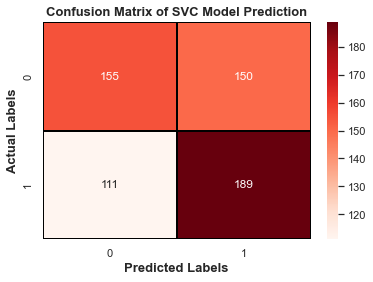

In [51]:
# data visualization of confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(expected4, predicted4)

# plot heatmap
sns.heatmap(data=cm4, annot=True, cmap='Reds', fmt='.0f', linewidths=.2,linecolor="black")
plt.xlabel('Predicted Labels', fontsize=13, fontweight='bold')
plt.ylabel('Actual Labels', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix of SVC Model Prediction', fontsize=13, fontweight='bold')
plt.show()

<h2>Random Forest Classifier</h2>

In [52]:
# Random Forest Classifier
# Does not require feature scaling as it is based on decision trees, not sensitive to the scale of the features
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# create Random Forest Classifier model
RFC = RandomForestClassifier()
# fit Random Forest Classifier model to the training data
RFC.fit(X_train, y_train)

# make predictions on validation data 
expected5 = y_val
predicted5 = RFC.predict(X_val)

# summarize the fit of the Random Forest Classifier model
print(metrics.classification_report(expected5, predicted5))
print(metrics.confusion_matrix(expected5,predicted5))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       305
           1       0.78      0.81      0.79       300

    accuracy                           0.79       605
   macro avg       0.79      0.79      0.79       605
weighted avg       0.79      0.79      0.79       605

[[236  69]
 [ 58 242]]


<h4>Confusion Matrix of Random Forest Classifier</h4>

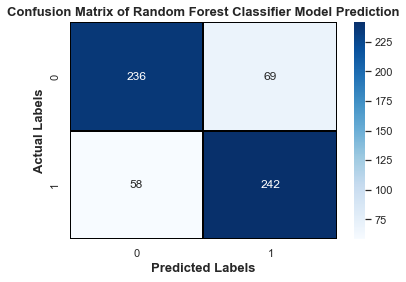

In [53]:
# data visualization of confusion matrix for Random Forest Classifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm5 = confusion_matrix(expected5, predicted5)

# plot heatmap
sns.heatmap(data=cm5, annot=True, cmap='Blues', fmt='.0f', linewidths=.2,linecolor="black")
plt.xlabel('Predicted Labels', fontsize=13, fontweight='bold')
plt.ylabel('Actual Labels', fontsize=13, fontweight='bold')
plt.title('Confusion Matrix of Random Forest Classifier Model Prediction', fontsize=13, fontweight='bold')
plt.show()

<h4>Feature Importance for Random Forest Classifier</h4>

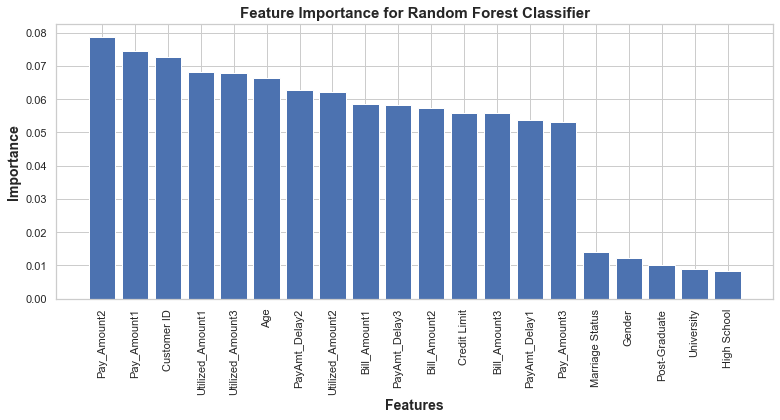

In [54]:
# get feature importance
RFC_featureImpt = RFC.feature_importances_

# get feature names (columns in df)
RFC_featureNames = X.columns

# sort indices, feature names and feature importance by descending order
RFC_sortedInd = np.argsort(RFC_featureImpt)[::-1]
RFC_sortedFeatures = RFC_featureNames[RFC_sortedInd]
RFC_sortedImpt = RFC_featureImpt[RFC_sortedInd]

# create and set figure size
plt.figure(figsize=(11, 6))

# plot feature importance bar graph
plt.bar(RFC_sortedFeatures, RFC_sortedImpt)

# graph labels, title
plt.xlabel('Features', fontweight='bold', fontsize=14)
plt.ylabel('Importance', fontweight='bold', fontsize=14)
plt.title('Feature Importance for Random Forest Classifier', fontweight='bold', fontsize=15)
# rotate x-axis labels 
plt.xticks(rotation=90)
# display graph
plt.tight_layout()
plt.show()

<h1><center> Comparing Models Performances and Choosing 'The One'!</center></h1>

<h2>1. Comparing Confusion Matrices and Classification Reports</h2>
- Shown above.

- KNN:
    - Precision: 0.69, recall-0.84
- LR:
    - precision-0.53, recall-0.63
- DTC:
    - precision-0.68, recall-0.80
- GNB:
    - precision-0.52, recall-0.93
- SVC: 
    - precision-0.56, recall-0.63
- RFC:
    - precision-0.78, recall-0.80

- From the recall and precision results from the classification reports of each model from above, <b>Random Forest Classifier</b> is seen to yield best model performance results, with the highest precision and recall values.
- This indicates that RFC performs well in correctly identifying true positives while minimizing false positives and false negatives.
- A high recall: RFC has low false negative rate.
- A high Precision: RFC correctly predicts true positives, RFC has a low false positive rate, it does not wrongly classify negative instances as positive.  
- Therefore, RFC has a higher number of true positives compared to false positives as compared to other models (Precision).
- And RFC also has a higher number of true positives compared to other models (Recall).

<h2>2. Plot Precision-Recall Curves</h2>

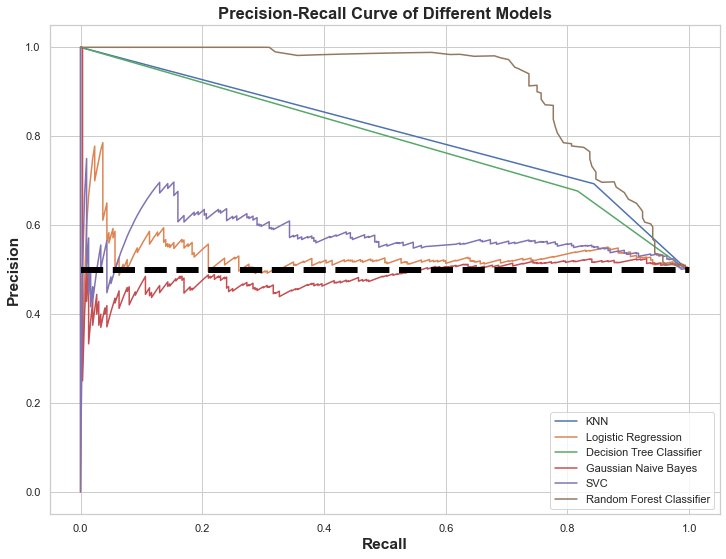

In [55]:
# import precision_recall_curve
from sklearn.metrics import precision_recall_curve

# calculate the precision and recall for KNN model
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(expected, knn_scaled.predict_proba(X_val)[:, 1])
# calculate the precision and recall for Logistic Regression model
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(expected1, logreg_scaled.predict_proba(X_val)[:, 1])
# calculate the precision and recall for Decision Tree Classifier model
precision_dtc, recall_dtc, thresholds_dtc = precision_recall_curve(expected2, DTC.predict_proba(X_val)[:, 1])
# calculate the precision and recall for Gaussian Naive Bayes model
precision_gnb, recall_gnb, thresholds_gnb = precision_recall_curve(expected3, gaussianNB.predict_proba(X_val)[:, 1])
# calculate the precision and recall for SVC model
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(expected4, SVC.predict_proba(X_val)[:, 1])
# calculate the precision and recall for Random Forest Classifier model
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(expected5, RFC.predict_proba(X_val)[:, 1])

# create and set figure size
plt.figure(figsize=(12,9))

# plot precision-recall curve for KNN
plt.plot(recall_knn, precision_knn, label='KNN')
# plot precision-recall curve for Logistic Regression
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
# plot precision-recall curve for Decision Tree Classifier
plt.plot(recall_dtc, precision_dtc, label='Decision Tree Classifier')
# plot precision-recall curve for Gaussian Naive Bayes
plt.plot(recall_gnb, precision_gnb, label='Gaussian Naive Bayes')
# plot precision-recall curve for SVC
plt.plot(recall_svc, precision_svc, label='SVC')
# plot precision-recall curve for Random Forest Classifier
plt.plot(recall_rfc, precision_rfc, label='Random Forest Classifier')

# plot line
plt.hlines(y=0.5, xmin=0, xmax=1, color='black', linestyle='--', linewidth=6)

# graph labels
plt.xlabel('Recall', fontsize=15.5, fontweight='bold')
plt.ylabel('Precision', fontsize=15.5, fontweight='bold')
# graph title
plt.title('Precision-Recall Curve of Different Models', fontweight='bold', fontsize=16.5)
# graph legend
plt.legend()
# display graph
plt.show()

- From the graph, 
    - It is seen that RFC has a higher precision-recall trade-off as compared to the other models. 
    - RFC is very close to the upper-right corner of the figure, indicating that it has high precision and recall values. 
    - RFC has the highest precision and recall values as compared to the other models.
    - Black-line (baseline): random classifier, precision and recall is balanced.
    - KNN and decision tree classifier is also not too far behind RFC in terms of high precision and recall values.
    - Since Gaussian Naive Bayes, SVC, Logistic Regression are all near the random baseline, it indicates that these models do not have such prominently high recall and precision values and hence should not be considered as chosen models. 
    - RFC seems to be the best model here, as it dominates and is consistently above the curves of other models.

<h2>3. Plot ROC Curves and Comparing AUC (Area Under Curve)</h2>

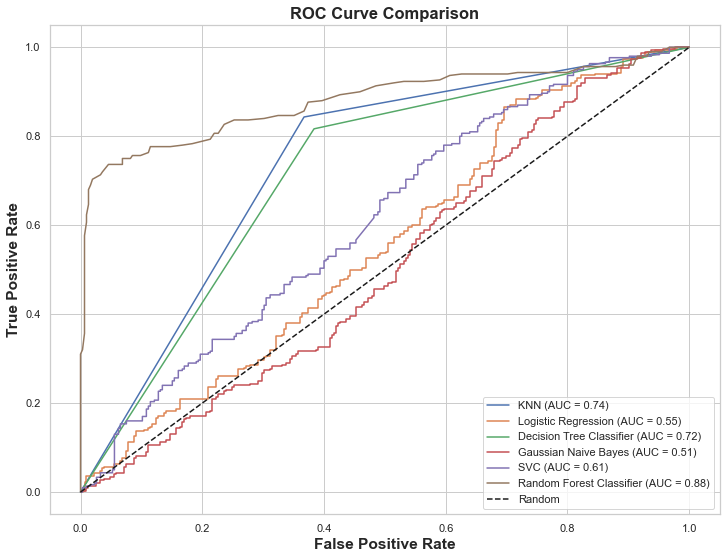

In [56]:
# import the roc_curve, auc
from sklearn.metrics import roc_curve, auc

# calculate the False Positive Rate (FPR), True Positive Rate (TPR), Area Under Curve (AUC) for each model
# for KNN
fpr_knn, tpr_knn, _ = roc_curve(expected, knn_scaled.predict_proba(X_val)[:, -1])
auc_knn = auc(fpr_knn, tpr_knn)
# for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(expected1, logreg_scaled.predict_proba(X_val)[:, -1])
auc_lr = auc(fpr_lr, tpr_lr)
# for Decision Tree Classifier
fpr_dtc, tpr_dtc, _ = roc_curve(expected2, DTC.predict_proba(X_val)[:, -1])
auc_dtc = auc(fpr_dtc, tpr_dtc)
# for Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(expected3, gaussianNB.predict_proba(X_val)[:, -1])
auc_gnb = auc(fpr_gnb, tpr_gnb)
# for SVC
fpr_svc, tpr_svc, _ = roc_curve(expected4, SVC.predict_proba(X_val)[:, -1])
auc_svc = auc(fpr_svc, tpr_svc)
# for Random Forest Classifier
fpr_rfc, tpr_rfc, _ = roc_curve(expected5, RFC.predict_proba(X_val)[:, -1])
auc_rfc = auc(fpr_rfc, tpr_rfc)

# create and set figure size
plt.figure(figsize=(12,9))

# plot ROC curves
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(auc_knn))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree Classifier (AUC = {:.2f})'.format(auc_dtc))
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes (AUC = {:.2f})'.format(auc_gnb))
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC = {:.2f})'.format(auc_svc))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier (AUC = {:.2f})'.format(auc_rfc))

# plot a diagonal line representing random classification - provides a baseline for comparison
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# graph labels
plt.xlabel('False Positive Rate', fontsize=15.5, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=15.5, fontweight='bold')
# graph title
plt.title('ROC Curve Comparison', fontweight='bold', fontsize=16.5)
# graph legend
plt.legend()
# display graph
plt.show()

<b> Interpretting the ROC Curve </b>
- A ROC Curve is constructed by plotting the true positive rate (TPR) against false positive rate (FPR).
- Ideal: 1.0 for TPR
- Baseline: a random classifier that gives (TPR = FPR) 
- The closer the curve comes nearer to diagonal baseline, the less accurate model is.
- From the graph above, Random Forest Classifier model has the best rates as it has the highest true positive rate, and lowest false positive rate (close to zero).

<b> Area under curve (AUC) </b>
- AUC = 1.0: perfect classifier that has a TPR of 1, and FPR of 0.
- AUC = 0.5: useless (random guessing)
- 0.5<AUC<1.0: higher the AUC, better the model.
- From graph above, Random Forest Classifier has best AUC value. 

<b> Therefore, Random Forest Classifier seems to be the best classification model used to predict which customer will have default payment next month. </b>

<h1><center>Model Improvement and Tuning Hyperparameters on Gradient Boosting Regression</center></h1>

<h3>Perform GridSearchCV</h3>
<h4>To search for the best combination of hyperparameters for Gradient Boosting Regression model</h4>

In [58]:
# Random Forest Classifier
# Does not require feature scaling as it is based on decision trees, not sensitive to the scale of the features
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# further split the train set into a new train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=0)

# create Random Forest Classifier model
RFC = RandomForestClassifier()

# define parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]  
}

# create GridSearchCV
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, scoring='accuracy', cv=5)

# fit gridsearch on training data
grid_search.fit(X_train, y_train)

# best model, best params, best score
best_score = grid_search.best_score_
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# make predictions on validation data 
expected5 = y_val
predicted5 = best_model.predict(X_val)

# summarize the fit of the Random Forest Classifier model
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)
print(metrics.classification_report(expected5, predicted5))
print(metrics.confusion_matrix(expected5,predicted5))

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.7861878453038673
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       305
           1       0.77      0.80      0.79       300

    accuracy                           0.79       605
   macro avg       0.79      0.79      0.79       605
weighted avg       0.79      0.79      0.79       605

[[234  71]
 [ 59 241]]


<h1><center>Using the Best Model on Testing Set</center></h1>

In [74]:
# Random Forest Classifier
# Does not require feature scaling as it is based on decision trees, not sensitive to the scale of the features
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# create Random Forest Classifier model
RFC = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
# fit Random Forest Classifier model to the testing data
RFC.fit(X_train, y_train)

# make predictions on validation data 
expected = y_test
predicted = RFC.predict(X_test)

# summarize the fit of the Random Forest Classifier model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       506
           1       0.87      0.89      0.88       502

    accuracy                           0.88      1008
   macro avg       0.88      0.88      0.88      1008
weighted avg       0.88      0.88      0.88      1008

[[438  68]
 [ 53 449]]


<h2>Creating a Dummy Baseline</h2>

In [75]:
# import dummy baseline 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

# define X and y for easy identification 
X = credit_df.drop('Default payment next month', axis=1)
# target variable
y = credit_df['Default payment next month']

# split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# create a dummy baseline model
dummy = DummyClassifier(strategy='most_frequent')

# fit dummy model on training data
dummy.fit(X_train, y_train)

# make predictions on testing data
expected = y_test
dummy_predicted = dummy.predict(X_test)

# summarize the fit of the Dummy Classifier model
print(classification_report(expected, dummy_predicted, zero_division=1))
print(confusion_matrix(expected, dummy_predicted))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       506
           1       0.50      1.00      0.66       502

    accuracy                           0.50      1008
   macro avg       0.75      0.50      0.33      1008
weighted avg       0.75      0.50      0.33      1008

[[  0 506]
 [  0 502]]


<h2>Compare Model Performance to Dummy Baseline: KFold Cross-Validation</h2>

In [77]:
# import
from sklearn.model_selection import cross_val_score, KFold

# create the K-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# perform K-fold cross-validation on RFC and dummy model
dummy_scores = cross_val_score(dummy, X, y, cv=kf, scoring='accuracy')
rfc_scores = cross_val_score(RFC, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=0), scoring='accuracy')

# mean accuracy scores for models
print("Dummy Baseline Accuracy: {:.4f}".format(dummy_scores.mean()))
print("Random Forest Classifier Accuracy: {:.4f}".format(rfc_scores.mean()))

Dummy Baseline Accuracy: 0.4929
Random Forest Classifier Accuracy: 0.9270
